**The pickels created in here, will NOT include X, Y coordinates**

In [0]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
from scipy import ndimage, misc
import glob
import os

In [0]:
# Load data
# Import the data:

from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

%cd /content/gdrive/My\ Drive/Deep_Learning/Images_Cropped/

# Display an image:
#img = plt.imread('1 V Duvil HF 290119.png')
#plt.imshow(img)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Deep_Learning/Images_Cropped


(656, 4)


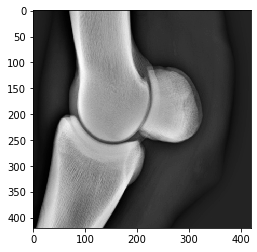

In [0]:
training_samples = []

# Store the names of every image
for count, image in enumerate(list(glob.glob('*.jpg'))):
    strImage = os.path.split(image[0])[-1] # Store the first character of the string to determine if the image is w/o fragmen
    if strImage == 'H': # Healthy
        if (count % 4) == 0:
          training_samples.append([plt.imread(image)/255, 0, "Original", count//4])
        else:
          training_samples.append([plt.imread(image)/255, 0, "Augmented", count//4])
    elif strImage == 'S': # Splinter
        if (count % 4) == 0:
          training_samples.append([plt.imread(image)/255, 1, "Original", count//4])
        else:
          training_samples.append([plt.imread(image)/255, 1, "Augmented", count//4])

training_samples = np.array(training_samples)
print(training_samples.shape)
plt.imshow(training_samples[0, 0], cmap=plt.get_cmap('gray'))

In [0]:
'''
with open('Cropped_Pickle_OGs.pickle', 'wb') as handle:
    pickle.dump(training_samples, handle, protocol=pickle.HIGHEST_PROTOCOL)

'''
with open("Cropped_Pickle_OGs.pickle", 'rb') as handle:
    training_samples = pickle.load(handle)


(656, 4)


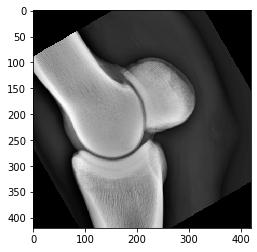

In [0]:
print(training_samples.shape)
test_picture = ndimage.rotate(training_samples[0, 0], 30, reshape=False)
plt.imshow(test_picture, cmap=plt.get_cmap('gray'))

In [0]:
rotated_pictures = []
for picture, label, _, origin in training_samples:
  for rotation_angle in range(-30, 0, 5): # -30, -25,.. -5.
    rotated_picture = ndimage.rotate(picture, rotation_angle, reshape=False)
    rotated_pictures.append([rotated_picture, label, "Augmented_Rotated", origin])

rotated_pictures = np.array(rotated_pictures)
print(rotated_pictures.shape)

(3936, 4)


In [0]:
with open('Cropped_Pickle_rotated_1.pickle', 'wb') as handle:
    pickle.dump(rotated_pictures, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
rotated_pictures = []
for picture, label, _, origin in training_samples:
  for rotation_angle in range(5, 35, 5): # 5, 10,.. 30.
    rotated_picture = ndimage.rotate(picture, rotation_angle, reshape=False)
    rotated_pictures.append([rotated_picture, label, "Augmented_Rotated", origin])

rotated_pictures = np.array(rotated_pictures)
print(rotated_pictures.shape)

(3936, 4)


In [0]:
with open('Cropped_Pickle_rotated_2.pickle', 'wb') as handle:
    pickle.dump(rotated_pictures[:2000], handle, protocol=pickle.HIGHEST_PROTOCOL)

In [0]:
with open('Cropped_Pickle_rotated_3.pickle', 'wb') as handle:
    pickle.dump(rotated_pictures[2000:], handle, protocol=pickle.HIGHEST_PROTOCOL)